In [19]:
import matplotlib.pyplot as plt
import os
from moviepy.editor import concatenate_videoclips, ImageSequenceClip, VideoFileClip
from moviepy.video.fx.resize import resize
import pandas as pd
import geopandas
import numpy as np

# delete existing files
for f in os.listdir("../Plots/Airports/"):
    os.remove(os.path.join("../Plots/Airports/", f))

# Import airport data


# data is from https://openflights.org/data#airlines
# removed '\N' values from the data + added column names
data = pd.read_csv('../Data/airports.csv', encoding='utf-8')


data = data[['airport_id','city','country','latitude','longitude','altitude']]
# Remove rows with missing values
data = data.dropna()


# cut altitude into 600 bins with the same count
data['altitude_cuts'] = pd.qcut(data['altitude'], q=60)

# encode as unique integers
data['altitude_group'] = data['altitude_cuts'].astype('category').cat.codes

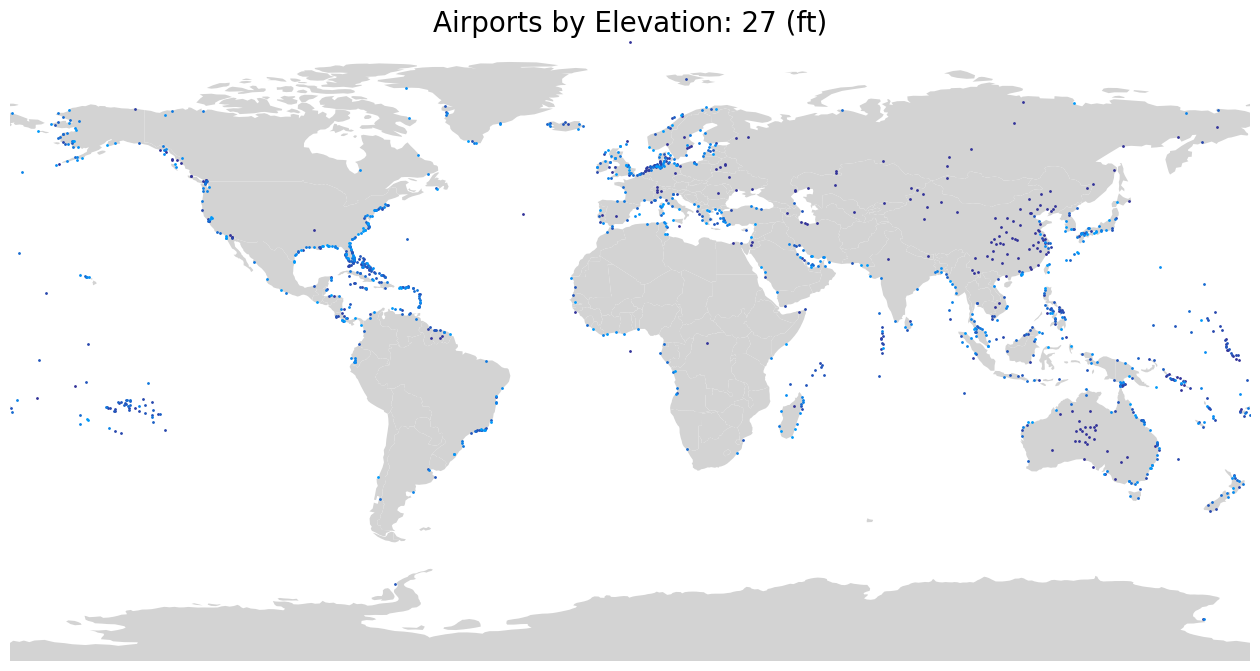

In [20]:
# Getting world map data from geo pandas
worldmap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map

fig = plt.figure(figsize=(16,9)) 


# Create axes
ax = fig.add_subplot(111)


ax.set_xlim([-180,180])
ax.set_ylim([-90,90])

ax.set_axis_off()

#ax.set_aspect(16/9)





map = worldmap.plot(color="lightgrey", ax=ax)

frames = data.altitude_group.nunique()
# create a list of colors of size frames
colors = plt.cm.terrain(np.linspace(0, 1, frames))



# def scatter_ani(i):
#     data[data['altitude_group']==i].plot(x='longitude', y='latitude', kind='scatter',color =  colors[i],s=1, ax=ax)

for i in range(frames):
    data[data['altitude_group']==i].plot(x='longitude', y='latitude', kind='scatter',color =  colors[i],s=1, ax=ax)
    # get average altitude
    avg_altitude = data[data['altitude_group']==i]['altitude'].mean()
    plt.title(f'Airports by Elevation: {round(avg_altitude)} (ft)', fontsize=20)
    # 300 is good dpi, but for fast lets do 80
    plt.savefig(f'../Plots/Airports/{i}.jpg', bbox_inches='tight', pad_inches=0, dpi=40)#dpi=300) 





In [21]:
import cv2
import os
# Each video has a frame per second which is number of frames in every second
frame_per_second = 60

plot_dir = "../Plots/Airports"
files = os.listdir(plot_dir)
files_and_duration = [(os.path.join(plot_dir, file), .1) for file in files]


w, h = None, None
for file, duration in files_and_duration:
    frame = cv2.imread(file)

    if w is None:
        # Setting up the video writer
        h, w, _ = frame.shape
        fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
        writer = cv2.VideoWriter('output.mp4', fourcc, frame_per_second, (w, h))

    # Repating the frame to fill the duration
    for repeat in range(int(duration * frame_per_second)):
        writer.write(frame)

writer.release()

Moviepy - Building video ../Videos/airports.mp4.
Moviepy - Writing video ../Videos/airports.mp4



Moviepy - Done !
Moviepy - video ready ../Videos/airports.mp4
